# PS Processing

In this tutorial, we demostrate how to do PS processing with the decorrelation CLI interface.
The input data for PS processing is prepared in [Load Data](./load_data.ipynb).

In [ ]:
!ls ./load_data

e.zarr	  lat.zarr  meta.toml	  n.zarr    range.zarr	scratch
hgt.zarr  lon.zarr  non_nan.zarr  phi.zarr  rslc.zarr	theta.zarr


## Amplitude dispersion index calculation

Here were calculate the amplitude dispersion index (ADI) which is used to identify persistent scatterers.

In [ ]:
import zarr
import numpy as np
from matplotlib import pyplot as plt
import colorcet
from decorrelation.cli.utils.logging import get_logger
from decorrelation.cli.ps import de_amp_disp

In [ ]:
rslc = './load_data/rslc.zarr'
adi = './ps_processing/adi.zarr'

In [ ]:
logger = get_logger()

In [ ]:
de_amp_disp(rslc,adi)

2023-11-05 23:35:11 - logging_args - INFO - running function: de_amp_disp
2023-11-05 23:35:11 - logging_args - INFO - fetching args:
2023-11-05 23:35:11 - logging_args - INFO - rslc = './load_data/rslc.zarr'
2023-11-05 23:35:11 - logging_args - INFO - adi = './ps_processing/adi.zarr'
2023-11-05 23:35:11 - logging_args - INFO - az_chunk_size = None
2023-11-05 23:35:11 - logging_args - INFO - n_az_chunk = None
2023-11-05 23:35:11 - logging_args - INFO - r_chunk_size = None
2023-11-05 23:35:11 - logging_args - INFO - n_r_chunk = None
2023-11-05 23:35:11 - logging_args - INFO - fetching args done.
2023-11-05 23:35:11 - zarr_info - INFO - ./load_data/rslc.zarr zarray shape: (2500, 1834, 17)
2023-11-05 23:35:11 - zarr_info - INFO - ./load_data/rslc.zarr zarray chunks: (1000, 1000, 1)
2023-11-05 23:35:11 - zarr_info - INFO - ./load_data/rslc.zarr zarray dtype: complex64
2023-11-05 23:35:11 - get_ras_chunk_size_from_ras_chunk_size - INFO - automatically determine az_chunk_size from 
          

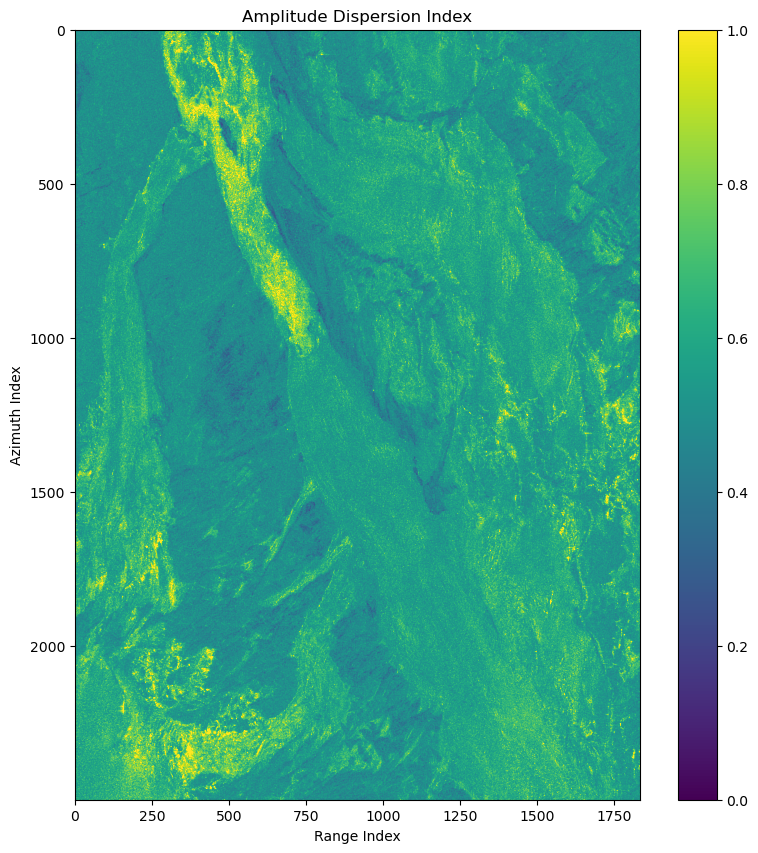

In [ ]:
adi_zarr = zarr.open(adi,'r')
fig, ax = plt.subplots(1,1,figsize=(10,10))
pcm = ax.imshow(adi_zarr[:],vmin=0,vmax=1)
ax.set(title='Amplitude Dispersion Index',xlabel='Range Index',ylabel='Azimuth Index')
fig.colorbar(pcm)
fig.show()